## Inception V3 Pytorch model is used on the Cat **Breed** Dataset

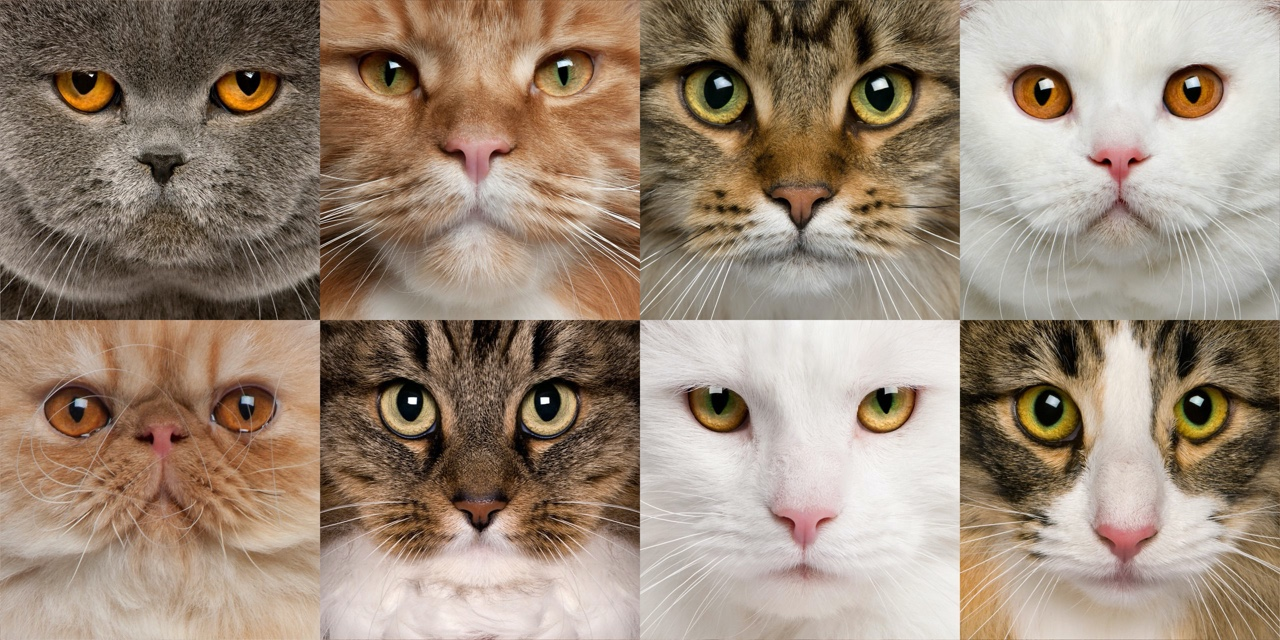




In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
 pip install kaggle

In [4]:
 mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets  download ma7555/cat-breeds-dataset

100% 1.92G/1.93G [00:18<00:00, 31.4MB/s]
100% 1.93G/1.93G [00:18<00:00, 110MB/s] 


In [8]:
! unzip /content/cat-breeds-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Tortoiseshell/46495717_25061.jpg  
  inflating: images/Tortoiseshell/46495784_25049.jpg  
  inflating: images/Tortoiseshell/46495794_25052.jpg  
  inflating: images/Tortoiseshell/46496797_24946.jpg  
  inflating: images/Tortoiseshell/46497000_24936.jpg  
  inflating: images/Tortoiseshell/46497664_24825.jpg  
  inflating: images/Tortoiseshell/46500078_24567.jpg  
  inflating: images/Tortoiseshell/46504471_24003.jpg  
  inflating: images/Tortoiseshell/46507777_23590.jpg  
  inflating: images/Tortoiseshell/46510043_23381.jpg  
  inflating: images/Tortoiseshell/46510643_23331.jpg  
  inflating: images/Tortoiseshell/46512081_23194.jpg  
  inflating: images/Tortoiseshell/46513326_23056.jpg  
  inflating: images/Tortoiseshell/46513392_23048.jpg  
  inflating: images/Tortoiseshell/46515915_22642.jpg  
  inflating: images/Tortoiseshell/46518048_22389.jpg  
  inflating: images/Tortoiseshell/46518676_22313.jpg  
  inflating: i

In [2]:
class_required=['Bombay', 'Calico', 'Burmese', 'Himalayan','Munchkin', 'Ragdoll', 'Siberian', 'British Shorthair', 'Russian Blue', 'Dilute Calico']

In [3]:
df=pd.read_csv('/content/data/cats.csv')

In [4]:
df.head()

,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
0,0,46744842,https://www.petfinder.com/cat/arianna-46744842...,Cat,Adult,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
1,1,46717321,https://www.petfinder.com/cat/ozzy-46717321/oh...,Cat,Adult,Male,Extra Large,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
2,2,46626338,https://www.petfinder.com/cat/zena-46626338/ca...,Cat,Senior,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,Baby,Female,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
4,4,46582751,https://www.petfinder.com/cat/ruby-46582751/fl...,Cat,Young,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


In [5]:
import os
from pathlib import Path
from scipy import ndimage, misc
import skimage
import scipy

In [6]:
filelist  = []

for dirname, _, filenames in os.walk('/content/images/'):
    for filename in filenames:
        filelist.append (os.path.join(dirname, filename))

In [7]:
len(filelist)

126607

In [8]:
Filepaths   = []
labels = []

for image_file in filelist:
    label = image_file.split(os.path.sep)[-2]
    if label in class_required:

        Filepaths.append(image_file)
        labels.append(label)
    

In [9]:
len(Filepaths)

15654

In [10]:
set(labels)

{'Bombay',
 'British Shorthair',
 'Burmese',
 'Calico',
 'Dilute Calico',
 'Himalayan',
 'Munchkin',
 'Ragdoll',
 'Russian Blue',
 'Siberian'}

In [11]:
df = pd.DataFrame( list( zip (Filepaths, labels) ), columns = ['Filepath', 'Labels'] )
df

,Filepath,Labels
0,/content/images/Munchkin/46132776_28.jpg,Munchkin
1,/content/images/Munchkin/34020430_283.jpg,Munchkin
2,/content/images/Munchkin/25172524_510.jpg,Munchkin
3,/content/images/Munchkin/18413850_700.jpg,Munchkin
4,/content/images/Munchkin/20093184_665.jpg,Munchkin
...,...,...
15649,/content/images/Burmese/13289281_1451.jpg,Burmese
15650,/content/images/Burmese/23120057_1017.jpg,Burmese
15651,/content/images/Burmese/22614340_1048.jpg,Burmese
15652,/content/images/Burmese/27505408_775.jpg,Burmese


In [12]:
from sklearn.utils import shuffle
df = (df.sample(frac = 1).reset_index()).drop(columns = 'index')
df

,Filepath,Labels
0,/content/images/Bombay/39106526_2864.jpg,Bombay
1,/content/images/Dilute Calico/32399814_7200.jpg,Dilute Calico
2,/content/images/Ragdoll/36787211_2759.jpg,Ragdoll
3,/content/images/Ragdoll/25522222_6160.jpg,Ragdoll
4,/content/images/Bombay/27829449_6139.jpg,Bombay
...,...,...
15649,/content/images/Russian Blue/42555468_5901.jpg,Russian Blue
15650,/content/images/Bombay/41216941_2359.jpg,Bombay
15651,/content/images/Dilute Calico/41555949_2477.jpg,Dilute Calico
15652,/content/images/Dilute Calico/33613263_6461.jpg,Dilute Calico


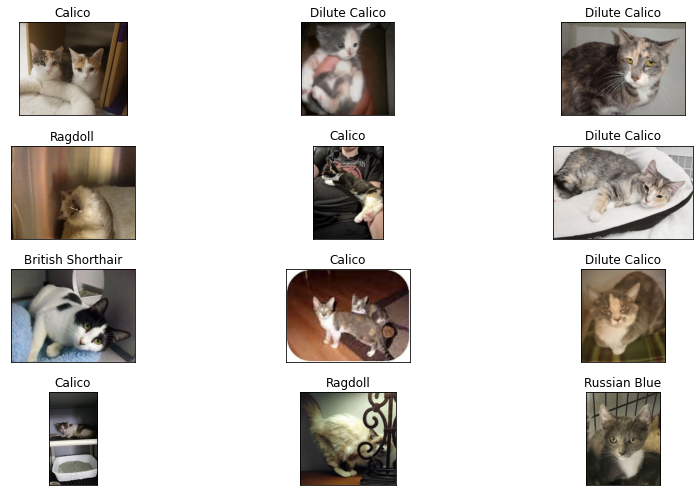

In [13]:
f,a = plt.subplots(nrows=4, ncols=3,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Labels[i])
    
plt.tight_layout()
plt.show()

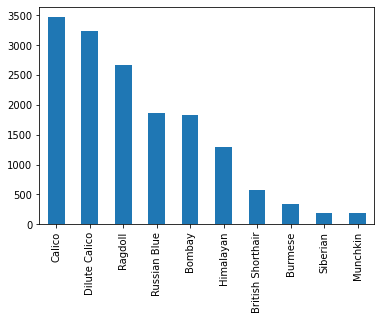

In [14]:
df['Labels'].value_counts().plot(kind='bar')

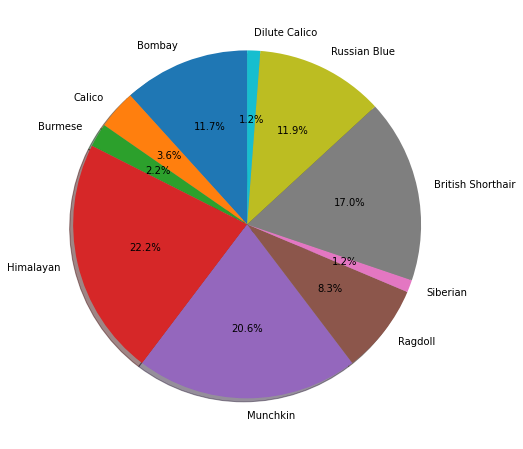

In [15]:
label = 'Bombay', 'Calico', 'Burmese', 'Himalayan','Munchkin', 'Ragdoll', 'Siberian', 'British Shorthair', 'Russian Blue', 'Dilute Calico'
plt.figure(figsize = (8,8))
plt.pie(df.groupby('Labels').size(), labels = label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.optim import lr_scheduler
import copy
import time
import torch.optim as optim
import cv2

In [14]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [15]:
def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [16]:
image_path='/content/images/'

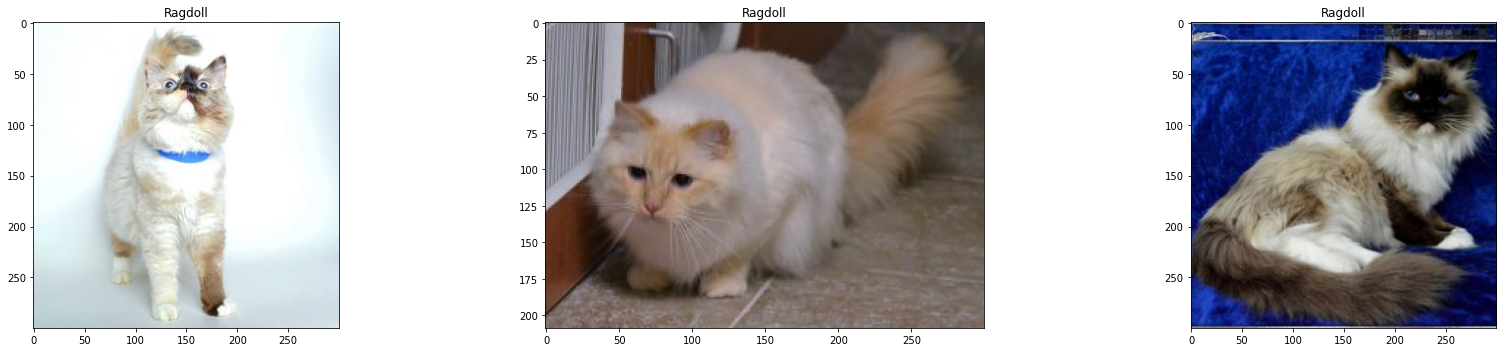

In [17]:
import matplotlib.image as img
fig,ax = plt.subplots(1,3,figsize = (25,5))

for i,idx in enumerate(df[df['Labels']=='Ragdoll']['Filepath'][-3:]):
    path = os.path.join(image_path,idx)
    ax[i].imshow(img.imread(path))
    ax[i].set_title('Ragdoll')
plt.tight_layout()
plt.show() 
 

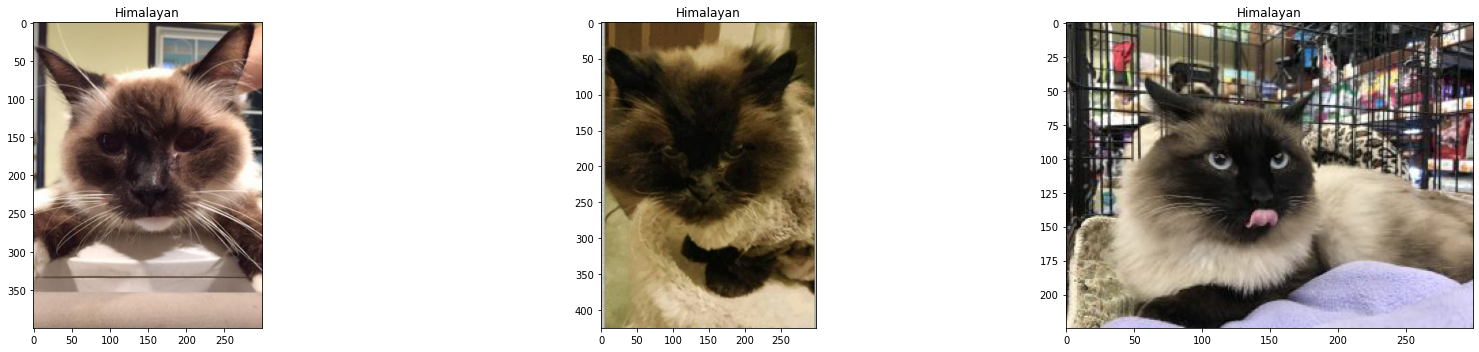

In [18]:
import matplotlib.image as img
fig,ax = plt.subplots(1,3,figsize = (25,5))

for i,idx in enumerate(df[df['Labels']=='Himalayan']['Filepath'][-3:]):
    path = os.path.join(image_path,idx)
    ax[i].imshow(img.imread(path))
    ax[i].set_title('Himalayan')
plt.tight_layout()
plt.show() 
 

In [19]:
train_path='/content/images/Train_images/'
test_path='/content/images/Test_images/'

In [25]:
train, test= train_test_split(df, stratify=df.Labels, test_size=0.25)

In [21]:
train.head()

,Filepath,Labels
1698,/content/images/Russian Blue/43409302_4800.jpg,Russian Blue
1514,/content/images/Dilute Calico/38576193_3794.jpg,Dilute Calico
10994,/content/images/Calico/46199132_52964.jpg,Calico
9858,/content/images/Calico/45991792_3050.jpg,Calico
6533,/content/images/Bombay/31459212_5074.jpg,Bombay


In [22]:
test.head()

,Filepath,Labels
2073,/content/images/Bombay/35139205_4014.jpg,Bombay
7477,/content/images/Dilute Calico/45467501_685.jpg,Dilute Calico
5652,/content/images/Ragdoll/31185889_4363.jpg,Ragdoll
10817,/content/images/Ragdoll/25455230_6178.jpg,Ragdoll
5845,/content/images/Russian Blue/45736363_1755.jpg,Russian Blue


In [23]:
import shutil
Train_labels=list (train['Labels'])
Test_labels=list (test['Labels'])
Train_images=list (train['Filepath'])
Test_images = list (test['Filepath'])

In [ ]:
for g in range(len(Train_images)):
    current_train_img=Train_images[g]
    current_train_label=Train_labels[g]
    shutil.copy(current_train_img,train_path+current_train_label)


In [ ]:
for f in range(len(Test_images)):
    current_test_img=Test_images[f]
    current_test_label=Test_labels[f]
    shutil.copy(current_test_img,test_path+current_test_label)

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Labels']=le.fit_transform(df['Labels'])

# Important Note:

**Here we will use Transfer Learning..i.e..using predefined Inception V3 model with a small variation in output layer. For Inception V3 we need the size of input image to be 299 X 299 and also necessary transformations.**

In [26]:
img_size=299

In [66]:
training_transforms = transforms.Compose([transforms.ToPILImage(mode='RGB',),
                                          transforms.RandomRotation(30),
                                          transforms.RandomResizedCrop(299),
                                          transforms.RandomHorizontalFlip(),
                                          transforms.ToTensor(),
                                          transforms.Normalize([0.485, 0.456, 0.406], 
                                                               [0.229, 0.224, 0.225])])

testing_transforms = transforms.Compose([transforms.ToPILImage(mode='RGB'),
                                         transforms.Resize(299),
                                         transforms.CenterCrop(299),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406], 
                                                              [0.229, 0.224, 0.225])])

In [ ]:
pip install Pillow

In [67]:
class Catbreeddataset(Dataset):
    def __init__(self, data, path , transform = None):
        super().__init__()
        self.data = data.values
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        img_name,label = self.data[index]
        img_path = os.path.join(self.path, img_name)
        image =  cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
        if self.transform is not None:
            image = self.transform(image)
        return image, label

In [68]:
train_data = Catbreeddataset(train, train_path, training_transforms)
test_data = Catbreeddataset(test, test_path, testing_transforms )

In [86]:
num_epochs = 20
num_classes = 10
batch_size = 128
learning_rate = 0.0056

In [87]:
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle=False, num_workers=2)

In [88]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([128, 3, 299, 299])
torch.Size([128])


In [89]:
def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


training images
torch.Size([3, 299, 299])


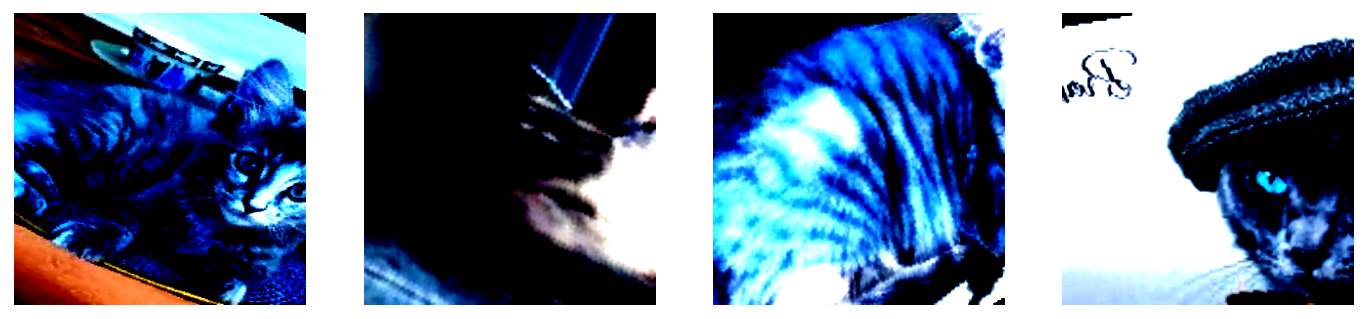

In [90]:
trainimages, trainlabels = next(iter(train_loader))

fig, axes = plt.subplots(figsize=(12, 12), ncols=4)
print('training images')
for i in range(4):
    axe1 = axes[i] 
    imshow(trainimages[i], ax=axe1, normalize=False)

print(trainimages[0].size())

In [91]:
model = torchvision.models.inception_v3(progress=True,pretrained=True)

In [92]:
print(model)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [178]:
for p in model.parameters():
    p.requires_grad = False

In [179]:
model.fc = nn.Sequential(
    nn.Linear(2048,512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Linear(512,256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Linear(128,num_classes)
)
model.aux_logits = False

In [180]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [181]:
model = model.to(device)

In [182]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1)

In [ ]:
%%time
train_losses = []
test_losses = []
train_accuracy=[]
test_accuracy=[]

for epoch in range(1, num_epochs + 1):
    train_loss = 0.0
    test_loss = 0.0
    train_acc = 0.0
    test_acc = 0.0
    total_train=0.0
    correct_train=0.0
    total_test=0.0
    correct_test=0.0
    model.train()
    for i,(data,target_train) in enumerate(train_loader, 0):
        data =  data.to(device)
        target_train = target_train.to(device)
        optimizer.zero_grad()
        outputs = model(data)
        _, predicted_train = torch.max(outputs.data, 1)
        loss = criterion(outputs, target_train)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
        total_train += target_train.size(0)
        correct_train += (predicted_train == target_train).sum().item()
    with torch.no_grad():
        model.eval()
        for i,(data,target_test) in enumerate(test_loader, 0):
            data = data.to(device)
            target_test = target_test.to(device)
            outputs= model(data)
            _, predicted_test = torch.max(outputs.data, 1)
            loss = criterion(outputs, target_test)
            test_loss += loss.item() * data.size(0)
            total_test += target_test.size(0)
            correct_test += (predicted_test == target_test).sum().item()
    train_loss = train_loss/len(train_loader.sampler)
    test_loss = test_loss/len(test_loader.sampler)
    train_acc = (100 * correct_train / total_train)
    test_acc  = (100 * correct_test / total_test)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    torch.cuda.empty_cache()
    print('Epoch: {} \tTraining Loss: {:.6f} \tTest Loss: {:.6f} \tTraining Acc: {:.6f} \tTest Acc: {:.6f}'.format(epoch, train_loss, test_loss,train_acc,test_acc))

Epoch: 1 	Training Loss: 1.506162 	Test Loss: 1.193448 	Training Acc: 45.238501 	Test Acc: 59.299949
Epoch: 2 	Training Loss: 1.380986 	Test Loss: 1.127944 	Training Acc: 49.676320 	Test Acc: 60.909555
Epoch: 3 	Training Loss: 1.373451 	Test Loss: 1.170383 	Training Acc: 50.076661 	Test Acc: 60.373020


**No Such Impovement so keyboard interuption is done **

# **Note:- Due to Resources limitation the model was not been able to improve and time complexity of every epochs was a big issue for experimenting further.**

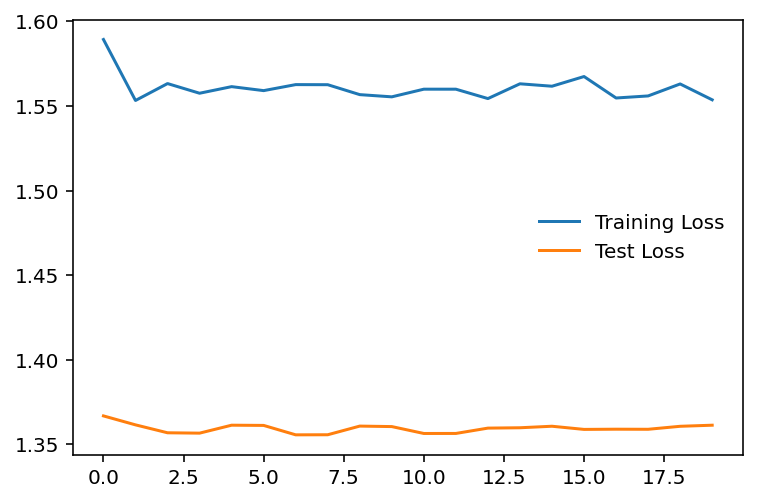

In [145]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses,label='Test Loss')
plt.legend(frameon=False)

In [146]:
model.eval()  # it-disables-dropout
with torch.no_grad():
    correct_test = 0
    total_test = 0
    for i,(data,target_test) in enumerate(test_loader, 0):
            data = data.to(device)
            target_test = target_test.to(device)
            outputs= model(data)
            _, predicted_test = torch.max(outputs.data, 1)
            loss = criterion(outputs, target_test)
            test_loss += loss.item() * data.size(0)
            total_test += target_test.size(0)
            correct_test += (predicted_test == target_test).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct_test / total_test))

Test Accuracy of the model: 51.83955033214103 %


In [149]:
preds=predicted_test.cpu().data.numpy()
target=target_test.cpu().data.numpy()

In [155]:
preds_label=le.inverse_transform(preds)
target_label=le.inverse_transform(target)

In [153]:
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,f1_score

[[ 8  0  0  0  0  0  0  0  0  0]
 [ 3 10  0  0  0  2  0  0  0  4]
 [ 1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  3  0  0  1  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 1  5  0  1  0  7  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 1  0  0  0  0  0  0  0  4  1]
 [ 1  8  0  0  0  1  0  0  4  3]]


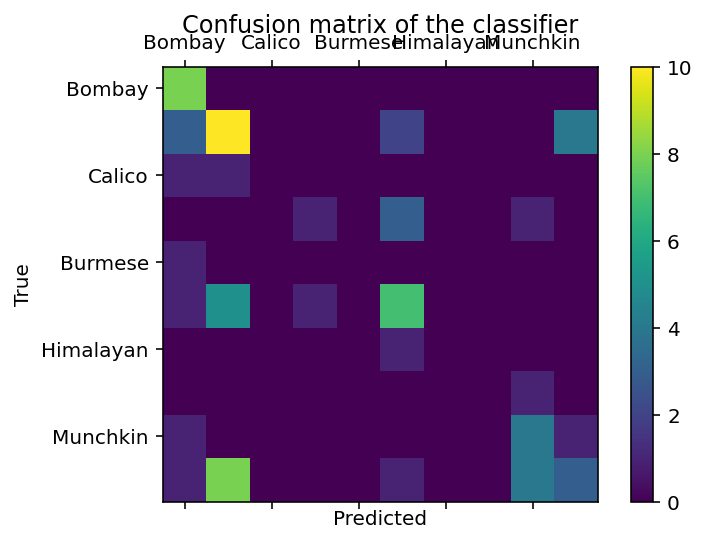

<Figure size 432x288 with 0 Axes>

In [161]:
labels = ['Bombay', 'Calico', 'Burmese', 'Himalayan','Munchkin', 'Ragdoll', 'Siberian', 'British Shorthair', 'Russian Blue', 'Dilute Calico']
cm = confusion_matrix(target_label, preds_label, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.tight_layout()

In [177]:
print("The ROC AUC Score on Test Data :{:.6f}".format(roc_auc_score(preds,target,multi_class='ovr')))
print('*'*50)
print("The Accuracy score on Test Data :{:.6f}".format(accuracy_score(preds,target)))
print('*'*50)
print("The F1_score on Test Data :{:.6f}".format(f1_score(preds,target,average='weighted')))
print('*'*50)

The ROC AUC Score on Test Data :0.490823
**************************************************
The Accuracy score on Test Data :0.445946
**************************************************
The F1_score on Test Data :0.490823
**************************************************
